# Computer Project for TMA4215

$$
\DeclareMathOperator{\Div}{div}
\DeclareMathOperator{\Grad}{grad}
\DeclareMathOperator{\Curl}{curl}
\DeclareMathOperator{\Rot}{rot}
\DeclareMathOperator{\ord}{ord}
\DeclareMathOperator{\Kern}{ker}
\DeclareMathOperator{\Image}{im}
\DeclareMathOperator{\spann}{span}
\DeclareMathOperator{\rank}{rank}
\DeclareMathOperator{\dist}{dist}
\DeclareMathOperator{\diam}{diam}
\DeclareMathOperator{\sig}{sig}
\DeclareMathOperator{\Id}{Id}
\DeclareMathOperator{\CQR}{CQR}
\DeclareMathOperator{\QR}{QR}
\DeclareMathOperator{\TR}{TR}
\DeclareMathOperator{\CTR}{CTR}
\DeclareMathOperator{\SR}{SR}
\DeclareMathOperator{\CSR}{CSR}
\DeclareMathOperator{\NCR}{NCR}
\DeclareMathOperator{\MR}{MR}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\NN}{\mathbb{N}}
\newcommand{\VV}{\mathbb{V}}
\newcommand{\PP}{\mathbb{P}}
\newcommand{\dGamma}{\,\mathrm{d} \Gamma}
\newcommand{\dGammah}{\,\mathrm{d} \Gamma_h}
\newcommand{\dx}{\,\mathrm{d}x}
\newcommand{\dy}{\,\mathrm{d}y}
\newcommand{\ds}{\,\mathrm{d}s}
\newcommand{\dt}{\,\mathrm{d}t}
\newcommand{\dS}{\,\mathrm{d}S}
\newcommand{\dV}{\,\mathrm{d}V}
\newcommand{\dX}{\,\mathrm{d}X}
\newcommand{\dY}{\,\mathrm{d}Y}
\newcommand{\dE}{\,\mathrm{d}E}
\newcommand{\dK}{\,\mathrm{d}K}
\newcommand{\dM}{\,\mathrm{d}M}
\newcommand{\cd}{\mathrm{cd}}
\newcommand{\onehalf}{\frac{1}{2}}
\newcommand{\bfP}{\boldsymbol P}
\newcommand{\bfx}{\boldsymbol x}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bfa}{\boldsymbol a}
\newcommand{\bfu}{\boldsymbol u}
\newcommand{\bfv}{\boldsymbol v}
\newcommand{\bfe}{\boldsymbol e}
\newcommand{\bfb}{\boldsymbol b}
\newcommand{\bfc}{\boldsymbol c}
\newcommand{\bfq}{\boldsymbol q}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bff}{\boldsymbol f}
\newcommand{\bfp}{\boldsymbol p}
\newcommand{\bft}{\boldsymbol t}
\newcommand{\bfj}{\boldsymbol j}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfV}{\boldsymbol V}
\newcommand{\bfE}{\boldsymbol E}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfzero}{\boldsymbol 0}
$$

In [2]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../../styles/tma4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
#css_styling()

## Part 2: The Heat Equation

After the crash course on finite difference methods in the first part we now return
to more known waters, namely numerical methods for ODE. The main goal
of this part  to develop a solver for the __classical heat equation__
\begin{alignat*}{3}
\partial_t u - \kappa \Delta u &= f
&& \quad \text{in } \Omega  \times (t_0, T)
\subset \RR^2 \times \RR,
\\
u &= u_D && \quad  \text{on } \partial \Omega  \times (t_0, T)
\subset \RR^2 \times \RR
\\
u(\cdot,t_0) &= u_0
&&\quad \text{in } \Omega.
\end{alignat*}
and this will be accomplished by
transforming the heat equation into an (large) ODE system
with the help of the finite difference method.

### Chapter 1: The Crank-Nicolson and $\theta$-Method for ODEs

We start from SMIA Lecture 22 on Runge-Kutta methods (have a look at the Jupyter notebook for concepts and notation).

#### Task 1: Derivation of the Crank-Nicolsen method

We recall the initial value problem for ordinary differential equations:

Given function $f: [0,T] \times \RR^n \to \RR^n$ and initial value
$y_0 \in \RR$, find $y: [0,T] \to \RR^n$ such that
\begin{align}
y'(t) &= f(t,y(t)) \quad t \in (0,T),
\tag{1a}
\\
y(0) &= y_0.
\tag{1b}
\end{align}

Recall the integral representation of (1a)-(1b) considered in Lecture 21 and 22
and apply the trapezoidal rule to the integral. 

__a__) How does the resulting one-step method look like?

__b__) Is this a Runge-Kutta method? Write down the Butcher table. 

<font color="purple">
Solution: 

__a__)     

Recall that the integral representation for $(1a)$ is 

$$ y(t_{i+1})- y(t_i) = \int_{t_i}^{ t_{i+1} } f(t, y(t))\,{\mathrm{d}}t $$

Now we want to approximate the integral from $t_i$ to $t_{i+1}$ by a quadrature rule, which in this case is the trapezoidal rule. Let $h=t_{i+1}-t_i$, be the step size.

$$ \int _{{t_{i}}}^{{t_{{i+1}}}}f(t, y(t) )\,{\mathrm{d}}t  \approx \frac{1}{2}h {\Big (} f(t_{i},y(t_{i}))+f(t_{{i+1}},y(t_{{i+1}})){\Big )} $$

If we replace $y(t_{{i+1}})$ with $y_{i+1}$ and $y(t_{i})$ with $y_i$ and combine the two equations above, we get:

$$ y_{i+1} = y_i + \frac{1}{2}h {\Big (} (f(t_i,y_i) + f(t_{i+1}, y_{i+1}){\Big )}$$

</font>

<font color="brown">

__b__) 

The expression above known as the Crank-Nicolsen method and is a second order implicit Runge-Kutta method. A general implicit Runge Kutta method is written on the form:

$${\displaystyle y_{n+1}=y_{n}+h\sum _{i=1}^{s}b_{i}k_{i}}$$

$${\displaystyle k_{i}=f\left(t_{n}+c_{i}h,y_{n}+h\sum _{j=1}^{s}a_{ij}k_{j}\right)}$$

We can observe that our method includes two stages derivatives $k_1$ and $k_2$. 
$$y_{i+1} = y_i + \frac{h}{2}(k_1 + k_2)$$ and we can observe directly that $b_1 = b_2 = \frac{1}{2}$.

$$k_1 = f(t_i,y_i)$$ such that $c_1 = 0$ and $a_{12} = a_{11} = 0 $.
$$k_2 = f(t_{i+1},y_{i+1}) = f(t_i + h, y_i + \frac{h}{2}(k_1 + k_2))
$$ such that $c_2 = 1$ and $a_{21} = a_{22} = \frac{1}{2}$.



Butcher table for Crank-Nicolsen method is then: 

\begin{align}
\renewcommand\arraystretch{1.2}
\begin{array}
{c|ccc}
0 & 0 & 0 \\
1 &\frac{1}{2} &\frac{1}{2} \\
\hline
& \frac{1}{2} &\frac{1}{2} 
\end{array}
\end{align}


</font>

#### Task 2: The the $\theta$-method

For $\theta \in [0,1]$ define the one-step theta method by

$$
y_{i+1} = y_i + \tau\left(\theta f(t_{i+1}, y_{i+1}) + (1-\theta)  f(t_{i}, y_{i})\right),
$$
so for a given $\theta$, a weighted sum/convex combination 
of $(t_{i+1}, y_{i+1})$ and $f(t_{i}, y_{i})$ is taken.

__a__) Write down the Butcher table.

__b__) Which known schemes to you get for $\theta=0,1,0.5$?

__c__) Use the __order conditions__ to determine the consistency order of the   $\theta$-method. (Your answer will depend on the choice of $\theta$. 
(Order condition will be discussed in the Lectures notes for cancelled Lecture 23).

__d__) Determine the stability function for $\theta$-method. (Will be the topic
in the Lecture on Wednesday, 13th of Nov.) 

<font color="green">

Solution: 
    
__a__)


\begin{align}
\renewcommand\arraystretch{1.2}
\begin{array}
{c|ccc}
0 & 0 & 0 \\
1 &(1-\theta) &\theta \\
\hline
&(1-\theta) &\theta 
\end{array}
\end{align}

</font>


<font color="orange">

__b__)


For $\theta = 0$:

\begin{align}
\renewcommand\arraystretch{1.2}
\begin{array}
{c|ccc}
0 & 0 & 0\\
0 & 1 & 1 \\
\hline
&1 & 0
\end{array}
\end{align}


We insert the constants into the RK-method:
$y_{i+1} = y_i + h f(t_i,y_i) $

This method is called the forward (explicit) Euler method.


For $\theta = 1$:

\begin{align}
\renewcommand\arraystretch{1.2}
\begin{array}
{c|ccc}
0 & 0 & 0 \\
1 &0 &1 \\
\hline
&0 &1
\end{array}
\end{align}

We insert the constants into the RK-method:
$y_{i+1} = y_i + h f(t_{i+1}, y_{i+1}) $

This method is called the backward Euler method (implicit).


For $\theta =0.5$: 

\begin{align}
\renewcommand\arraystretch{1.2}
\begin{array}
{c|ccc}
0 & 0 & 0 \\
1 &\frac{1}{2} &\frac{1}{2}\\
\hline
&\frac{1}{2} &\frac{1}{2}
\end{array}
\end{align}

We recognize this table from Task 1 as Crank-Nicolsen method.

$y_{i+1} = y_i + \frac{1}{2}h ( (f(t_i,y_i) + f(t_{i+1}, y_{i+1}))$


</font>

<font color="purple">

__c__) 

A RK-method is consistent if $\sum _{j=1}^{i-1}a_{ij} = c_{i}$ for $i=1,2...s$

$$a_{21}+a_{22} = 1-\theta + \theta = 1 = c_2$$

therefore the $\theta$-method is consistent for all values of $\theta$ in the given interval, $\theta \in [0,1] $.


We want to find the order of the $\theta$-method as a function of $\theta \in [0,1] $. We start by checking the expressions from Theorem 4.5 in the lecture notes from order $p=1$ and up to it fails.

$$1 =  \sum b_i = b_1 + b_2 = 1-\theta + \theta = 1$$

$$\frac{1}{2} = \sum b_i c_i = b_1 c_1 + b_2 c_2 = 0 + \theta = \theta$$ 

$$\frac{1}{3} = \sum b_i c_i^2 = b_1 c_1^2 + b_2 c_2^2= 0 + \theta = \theta$$ 


For the last two equation we get the same result. From the theorem we can argue that it is impossible for any methods to have degree $p=3$ because of this result. 

The consistency order for the $\theta$-method is given below:


$$p = 2  \quad \text{for } \theta = 0.5 $$
$$p = 1 \quad \text{for } \theta \neq 0.5  $$


</font>

<font color="green">

d) 
 
We will now determine the stability function, $R(z)$ for the $\theta$ method.

We define the test equation $f(t,y) = y' = \lambda y$ and apply the $\theta$-method to the problem.

\begin{align}
y_{i+1} = y_i + h\left((1-\theta)  f(t_{i}, y_{i}) + \theta f(t_{i+1}, y_{i+1})\right)
&= y_i + (1-\theta) h \lambda y_i + \theta h\lambda y_{i+1}
\end{align}

let $z = h\lambda $

$$ y_{i+1} (1-z\theta) = y_i ( 1 + z(1-\theta)) $$

$$ R(z) = \frac{1+ z(1-\theta)}{1-z\theta} $$


</font>

#### Task 3

Implement the $\theta$ method and compute the numerical solution to simple initial value 
problem
$$
y' = \mu y 
\\
y(0) = y_0.
$$

__a__) Implement the general $\theta$-method and validate your implementation
by computing the numerical solution for
initial vale problem on the interval $(0,1)$ for $y_0=1$, $\mu = 1$, including a 
convergence/EOC test as we did before.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def theta_method(y0, mu, t0, T, n, theta):
    
    #f = lambda t, y: mu*y #y' = f(t,y)
    u = lambda t :np.exp(t*mu) #exact solution

    
    ys = [y0] #num solitions
    ts = [t0] #time steps
    us = [u(t0)] #exact solutions for time steps
    es = [abs(y0 - u(t0))] #errors
    
    h =  (T-t0)/n #step length
    
    R = (1+h*mu*(1-theta))/(1-h*mu*theta) #R(z)
    
    # Start time-stepping
    for i in range(1,n):
        t, y = ts[-1], ys[-1]
        
        #calculate new y
        yn = R*y #y_{i+1}
        
        # Compute next time-step
        t += h
        
        ys.append(yn)
        ts.append(t)
        us.append(u(t))
        es.append(abs(u(t)-yn))
        
        
    return ts,ys,es,us


In [3]:
#calculate the EOC
def eoc(k, errs, n):
    return ( np.log(errs[k-1]) - np.log(errs[k-2]) ) / ( np.log(n[k-2]) - np.log(n[k-1]) )
 


Theta = 0, y(t) -> 2.7101482242033237

Theta = 0.5, y(t) -> 2.7128516002188476

Theta = 1, y(t) -> 2.7155630931298638


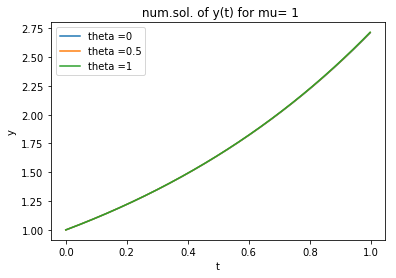

In [27]:
#given test variables
mu = 1
t0, T = 0,1
y0 = 1
thetas = [0,0.5,1]

#list of n-values
nvals = [100,200,500]
errs =  [] #maximal errors
    
plt.figure()
plt.xlabel("t")
plt.ylabel("y")

for theta in thetas:
    for n in nvals:
        ts, ys, es, us = theta_method(y0, mu, t0, T, n, theta)
        errs.append(max(es))
    plt.plot(ts,ys, label = "theta =" + str(theta))
    plt.legend()
    plt.title(" num.sol. of y(t) for mu= "+ str(mu))
    
    

    print("\nTheta = " + str(theta) + ", y(t) -> " + str(ys[-1]))
    eoc1= eoc(1,errs,nvals)
    eoc2 = eoc(2,errs,nvals)
    #print(errs)
    errs.clear()
    #print(eoc1, eoc2)


<font color="green">
 
Solution:

We know that the exact solution is $e^{t\mu}$. For $\mu = 1$, the exact solution is $e^{t\mu} = e^t \approx 2.7$.
We can see from the plot above that the numerical solution $y(t)$ converges to the exact solution for every $\theta$.

The error of convergence for different $n$ is: 

<table>
  <thead>
    <tr>
      <th>theta</th>
      <th>n</th>
      <th>EOC</th>
      <th>maximal error</th> 
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>100</td>
      <td>-</td>
      <td>0.0132</td>
    </tr>
    <tr>
      <td>0</td>    
      <td>200</td>
      <td>0.985</td>
      <td>0.0067</td>
    </tr>
    <tr>
      <td>0</td>    
      <td>500</td>
      <td>0.978</td> 
      <td>0.0027</td>
    </tr>
      <tr>
      <td></td>    
      <td></td>
      <td></td>
      <td></td>
    </tr>
    <tr>
      <th>0.5</th>
      <td>100</td>
      <td>-</td> 
      <td>2.220e-5</td>  
    </tr>   
      <tr>
      <td>0.5</td>
      <td>200</td>
      <td>1.990</td> 
      <td>5.606e-6</td>  
      </tr>
      <tr>
      <td>0.5</td>
      <td>500</td>
      <td>1.985</td> 
      <td>9.024e-7</td>  
      </tr>
      <tr>
      <td></td>    
      <td></td>
      <td></td>
      <td></td>
    </tr>
      <tr>
      <th>1</th>
      <td>100</td>
      <td>-</td> 
      <td>0.0134</td>  
    </tr>   
      <tr>
      <td>1</td>
      <td>200</td>
      <td>0.994</td> 
      <td>0.0067</td>  
      </tr>
      <tr>
      <td>1</td>
      <td>500</td>
      <td>0.992</td> 
      <td>0.0027</td>  
      </tr>
      
  </tbody>
</table>

The table above confirms the convergence for the all the three methods as the errors decrease for an increasing number of grid points $n$. But the solutions converges in a different rate for different $\theta$.
This can be visualized through the experimental order of convergence which looks like it is converging for each method (mark that EOC can happen to increase for increasing $n$ as it is calculated with an experimental method for calculating the order for the method).

For $\theta = 0$, $p = 1$.

For $\theta = 0.5$, $p = 2$.

For $\theta = 1$, $p = 1$.


</font>

__b)__ Now for $\mu \in \{-10, -100, -1000\}$ define the reference step length
$\tau_{\mu} = \dfrac{2}{|\mu|}$, plot the exact solutions and compute and plot
the numerical solution for $\tau \in \{ 5\tau_{\mu}, \tau_{\mu}, 1/5\tau_{\mu} \}$
and $\theta \in \{0, 0.5, 1\}$ What do you oberserve and why?

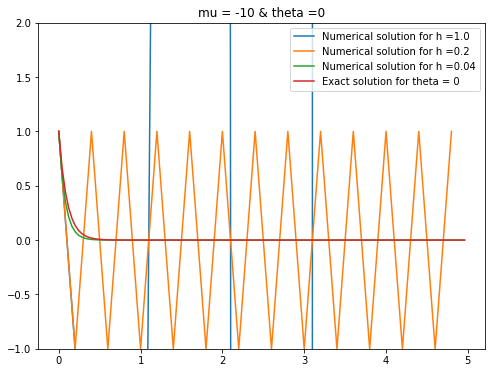

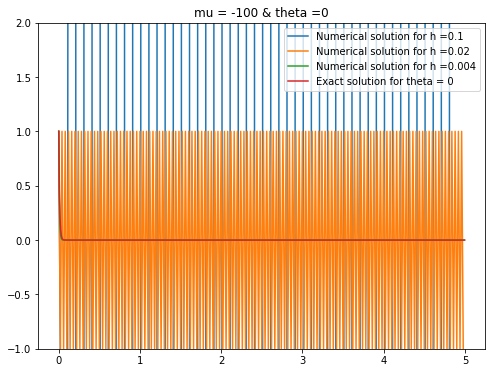

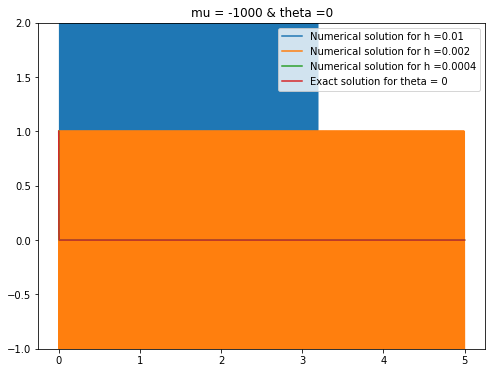

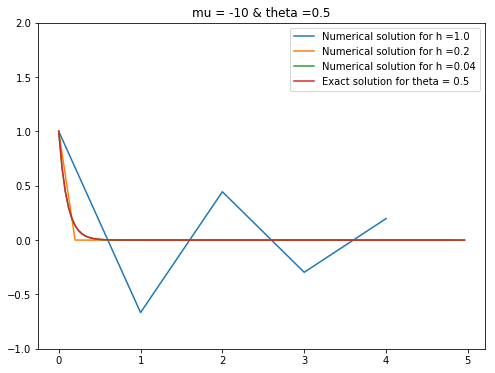

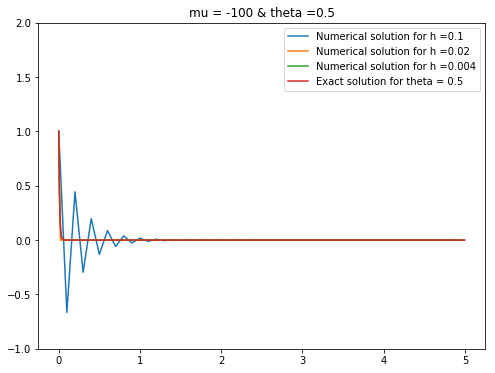

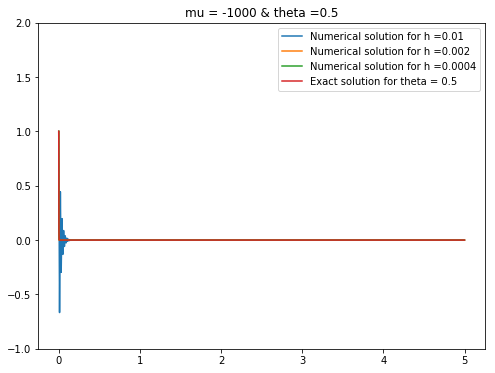

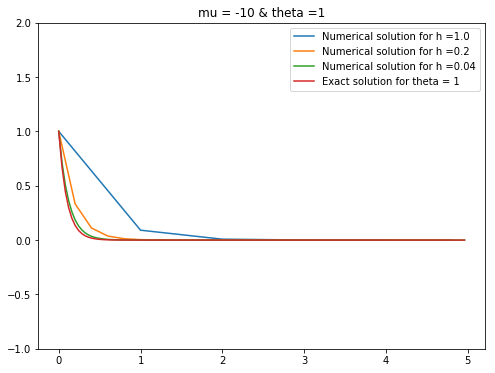

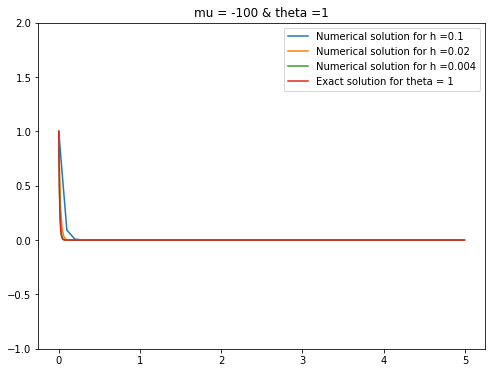

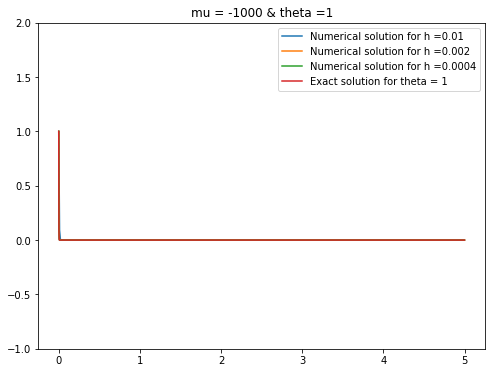

In [26]:
y0 = 1
t0,T = 0,5

for theta in [0, 0.5 ,1]: # different methods
    
    for mu in [-10, -100, -1000]: # different equations
        tau = 2/np.abs(mu)
        
        #make figure
        plt.figure(figsize = (8,6) )
        plt.title( "mu = " + str(mu) + " & theta =" + str(theta) )
        plt.ylim(-1,2)
        
        #different step lenghths 
        for h in [5*tau, tau, 1/5*tau]:
         
            #find n
            n = np.int( T/h )
            ts, ys, es,us = theta_method(y0, mu, t0, T, n, theta)
            
             #plot
            plt.plot(ts,ys, label = "Numerical solution for h =" + str(round(h,5))) #numerical
            plt.legend()
        
        #plot exact solution for each theta and mu
        plt.plot(ts, us, label = "Exact solution for theta = " + str(theta)) #exact
        plt.legend()

<font color="brown">
Solution:
    
The exact solution for the equation is $y(t) =e^{\mu t}$. With $\mu \in \{-10, -100, -1000\}$, the solution should converge towards zero, this can also be observed in the plots above.

The plots show the numerical and the exact solution for each $\mu$ and $\theta$, where different step lengths $h$ for the same $\theta$-method are visualized together.

From these plots we observe that the numerical solutions tends to converge for the smallest step length independent of which numerical method that is used, this is logical. We can also see that there is a difference between the three methods according to convergence of the solution. 

For $\theta = 0.5$ , backward Euler method and for $\theta = 1$, Crank-Nicolsen method, the solution converges for all the given step lengths, but with a higher convergence rate for a the lowest $h$. 

For $\theta = 0$, the forward Euler, we only achieve convergence for the smallest step length. 

This can also be visualised through the Stability function $R(z)$, as convergence is a conseqence of stability. 

Recall that we want $|y_{n+1}| < |y_n|$ in order to achieve convergence. 
For the RK-methods we have applied we get $ y_{n+1}R(z) = y_n$, where $R(z)$ is the stability function. The numerical solution is therefore stable if $|R(z)| \leq1$.

Recall that for the $\theta$-method, with the stability function we have found, the solution convergences if
$$ |R(z)| = | \frac{1+ z(1-\theta)}{1-z\theta} | \leq 1$$ for $z = \mu h$.

If we insert $\theta = 0$, then $R(h\mu) = 1+h\mu$. From this it is clear that only the smallest step length for each $\mu$ satisfies $ |R(z)| \leq 1$ and therefore gives convergence for the numerical solution. The method is not stable for all $h$.  

For the other two methods, $\theta = 0.5$ and $\theta = 1$ the stability function satisfies $|R(z)| \leq1$ for any of the given step lenghts $h$. We can conclude that the two methods are stable for any $h$. This is also what we observed in the figures above. 


### Chapter 2: The $\theta$-method for the heat equation

\Now you are asked to combine the $\theta$ scheme the finite difference method 
as space discretization to solve the heat equation

\begin{alignat*}{3}
\partial_t u  - \Delta u  &= f  \quad && \text{in } \Omega \times (0,T]
\\
u &= g_D \quad && \text{on } \partial \Omega \times (0, T]
\\
u(x,0) &=  u_0(x) \quad && \text{in } \Omega
\end{alignat*}
 
with initial value $u_0$ and bounday value $g_D$. As before $\Omega = [0,1]^2$.
We proceed as follows.

As in Chapter 2 of part 1 a grid of $N = (n+1)^2$ grid points
$$
\{(x_j,y_j)\}_{i,j=0}^n = \{(ih,jh) \in [0,1]^2: 0\leqslant i,j \leqslant n \}
$$ are defined with the grid size $h = 1/n$.

Now we discretize in space first, starting from the idea that
\begin{align}
f(x,y,t) &= \partial_t u(x,y,t)  - \Delta u(x,y,t)
\nonumber
\\
&\approx \partial_t u(x,y,t)- (\partial_x^+ \partial_x^- +  \partial_y^+ \partial_y^- )u(x,y,t)
\nonumber
\end{align}

Since we have a partial differential equation which depends on time,
the idea is to associate with each grid point $(x_i,y_j)$ a 
__time-dependent__ unknown $U_{i,j}(t)$. Then using the finite difference method 
in space to discretize the Poisson operator $-\Delta$ we end up with the following
__system of ordinary differential equations__:

Find $U(t) = \{U_{i,j}\}_{i,j=0}^n \in \RR^{(n+1)^2} = \RR^N$ such that
\begin{align}
&\dfrac{d}{dt}U_{i,j}(t) 
-(\partial_x^+ \partial_x^- + \partial_y^+\partial_y^-) U_{ij}(t)
\nonumber
\\
=
&\dfrac{d}{dt}U_{i,j}(t) + \dfrac{4 U_{i,j}(t) - U_{i+1,j}(t) - U_{i,j+1}(t) - U_{i-1, j}(t) -  U_{i, j-1}(t)}{h^2}
\nonumber
\\
= & f(x_i, y_j,t) =: F_{ij}(t) \quad \text{for } i,j = 1,\ldots n-1,
\tag{2a}
\\
U_{i,j}(0) &= u_0(x_i, y_j) \quad \text{for } i,j = 0,\ldots n,
\tag{2b}
\end{align}
together with the boundary conditions
\begin{gather}
U_{i,j}(t) = g_D(x_i, y_j, t) \quad \text{for } (i,j) \in \{0,\ldots, n\} \times \{0,n\}
\cup \{0,n\}  \times \{0,\ldots, n\}.
\tag{2c}
\end{gather}

This is often also called a __semi-discretization (in space)__ of the heat equation (since we only discretized the equation in space but not yet in time).

Next, we subdivide $(0,T)$ into $m$ subintervals defined by the points
$\{t_k\}_{k=0}^m$ with $t_k = \tfrac{k T}{m}$,
and apply the $\theta$ method to the ODE system (2a).
We write $U_{i,j}^k$ for the approximation of $U_{i,j}(t_k)$,
$F_{i,j}^k = F_{i,j}(t_k)$,
and introduce $\overline{\theta} = 1 - \theta$.
Then after reordering terms we need to solve
\begin{align}
&\phantom{=} U_{i,j}^{k+1} 
+\tau \theta \dfrac{4 U_{i,j}^{k+1} - U_{i+1,j}^{k+1} - U_{i,j+1}^{k+1} - U_{i-1, j}^{k+1} -  U_{i, j-1}^{k+1}}{h^2}
\nonumber
\\
&= U_{i,j}^{k} -\tau \theta \dfrac{4 U_{i,j}^{k} - U_{i+1,j}^{k} - U_{i,j+1}^{k} - U_{i-1, j}^{k} -  U_{i, j-1}^{k}}{h^2}   + \tau \theta F_{ij}^{k+1} + \tau \overline{\theta} F_{ij}^{k}
\quad \text{for } i,j = 1,\ldots n-1,
\tag{3a}
\\
U_{i,j}(0) &= u_0(x_i, y_j) \quad \text{for } i,j = 0,\ldots n,
\tag{3b}
\end{align}
together with the boundary conditions
\begin{align}
U_{i,j}^{k+1} = g_D(x_i, y_j, t_{k+1}) \quad 
&\text{for } (i,j) \in \{0,\ldots, n\} \times \{0,n\}
\cup \{0,n\}  \times \{0,\ldots, n\}
\nonumber
\\
&\text{for } k = 1, \ldots, m.
\tag{3c}
\end{align}


Finally, we need to translate (3a)-(3c) into a linear  system.
We introduce again as for the 2D Poisson problem an index mapping $\NN^2 \ni (i,j) \mapsto I(i,j) \in \NN$ to translate the double index into a single index $I = I(i,j) \in \RR^N$, $N=(n+1)^2$. Then applying the $\theta$ scheme to (2a) results in the
following method:

* Set $U^0 = \{U^0_{I}\}_{I=0}^{N-1} \in \RR^N$ with $U^0_{I(i,j)} = u_0(x_i, y_j)$ 
 for $i,j = 0,\ldots n$.
* For $k=0,\ldots, m-1$, compute $U^{k+1} \in \RR^N$ by solving the
linear system
 \begin{align}
 (\Id + \tau \theta A)U^{k+1}
= B^{k+1}
\tag{4}
\end{align}

Note this is only the case if $\theta > 0$, for $\theta = 0$, we have an explicit solver.
Here $\Id$ is the $N \times N$ identity matrix, and $A$ is the $N\times N$ matrix
resulting from the finite difference operator after index-remapping, and
with $A_{I,I} = 0$ for those index $I$ which correspond to a boundary index tuple
$(i,j)$. So $A$ is in principal the same matrix you implemented
in Part 1, Chapter 2, Task 3 but __without__ the extra modifications to set
boundary conditions.

The right-hand side $B^{k+1} \in \RR^{N}$ is computed as follows. First you compute
$$
B^{k+1} := (\Id - \tau \overline{\theta} A)U^{k}
+ \tau \theta F^{k+1} + \tau \overline{\theta} F^{k}.
$$
To incorporate the boundary conditions, you now modify $B^{k+1}$
for those index $I$ which correspond to a boundary index tuple 
$(i,j)$ by setting
$$
B^{k+1}_{I(i,j)} = g_D(x_i, y_j, t_{k+1}) \quad 
\text{for } (i,j) \in \{0,\ldots, n\} \times \{0,n\}
\cup \{0,n\}  \times \{0,\ldots, n\}.
$$
Since $A_{I,I}= 0$ for those indices, we see that then
$$
 ((\Id + \tau \theta A)U^{k+1})_{I} = U^{k+1}_{I} = B^{k+1}_{I} = g_D(x_i, y_j, t_{k+1})
$$
so $U^{k+1}$ satisfy our boundary condition at the boundary grid points at $t_{k+1}$.

#### Task 4

Implement the resuling solver to solve the heat equation. Reuse as much code
as possible from Part 1, Chapter 2 on the 2D Poisson problem, in particular
the generation of the finite difference matrix and the implementation of 
boundary conditions.

For code validation, use analytical reference function of the form
$$
u(x,y,t) = \sin(k x) \sin(l y)\exp(-\mu t)
$$
on $\Omega = [0,2\pi]^2$ and $t_0 = 0$ and $T = 1$.
for some integers $k, l$ and a constant $\mu$.

__a__) Find $\mu = \mu(k,l)$ so that u(x,y,t) is a solution of the
heat equation with $f = 0$.

__b__) For $\theta \in \{0, 0.5, 1\}$ compute the numerical solution with initial data and boundary data corresponding to the function you determined in __a__)
on a number of grids with $n = \{10, 20, 40, 80\}$ corresponding to grid sizes $h = \{2\pi/10, 2\pi/20, 2\pi/40, 2\pi/80\}$.

For each of the $h$, choose the corresponding time step $\tau = h/(2\pi)$
to run your simulation and create an animation (see coding hints below)
for

* the exact solution;
* the numerical solution;
* the error function defined by $E_{i,j}^k = U^k_{i,j} - u(x_i, y_i, t_k)$.

__c__) For the simulation you ran in __b__) compute the total error as
as a function of $n$
$$
\mathrm{err(n)} = \max_{k} \max_{i,j} | U^k_{i,j} - u(x_i, y_i, t_k) |
$$
What error convergence rates do you obtain for the various $\theta$?

## Task 4

#### a)

Since $f=0$ we obtain the following equation $$\partial_t u(x,y,t)  = \Delta u(x,y,t)$$, where $$\frac{\partial^{2} u}{\partial x^{2}} = -k^{2} sin(kx) sin(ly) e^{-\mu t}$$, $$\frac{\partial^{2} u}{\partial y^{2}} = -l^{2} sin(kx) sin(ly) e^{-\mu t}$$ and $$\partial_t u = -\mu sin(kx) sin(ly) e^{-\mu t}.$$ Thus we get $$-\mu sin(kx) sin(ly) e^{-\mu t} = (-k^{2}-l^{2}) sin(kx) sin(ly) e^{-\mu t}$$ and obtain the following relation $$\mu = k^{2}+l^{2}. $$

#### b)

In [ ]:
from scipy.sparse import identity, dok_matrix
from scipy.sparse.linalg import spsolve
from scipy.sparse.linalg import factorized
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import numpy as np


%matplotlib notebook


def _plot_frame_fdm_solution(i, ax, X, Y, U_list, title, zlim=None):
    ax.clear()
    line  = ax.plot_surface(X, Y, U_list[i],             
            rstride=1, cstride=1, # Sampling rates for the x and y input data
            cmap=cm.viridis)      # Use the new fancy colormap viridis
    if zlim is not None:
        ax.set_zlim(zlim)
    total_frame_number = len(U_list)
    complete_title = title + (" (Frame %d of %d)" % (i,total_frame_number))
    ax.set_title(complete_title)
    return line

def plot_2D_animation(X, Y, U_list, title='', duration=10, zlim=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
 
    fargs = (ax,X,Y,U_list, title, zlim)
    frame_plotter = _plot_frame_fdm_solution

    frames = len(U_list)
    interval = duration/frames*1000
    ani = animation.FuncAnimation(fig, frame_plotter, 
            frames=len(U_list), fargs=fargs, 
            interval=interval, blit=False, repeat=True)
    return ani

In [ ]:
# Define index mapping
def I(i,j,n):
    return i + j*(n+1)

In [ ]:
# find A matrix

def fdm_poisson_2d_matrix(n, I):
    # Gridsize
    h = 2*np.pi/n
    
    # Total number of unknowns is N = (n+1)*(n+1)
    N = (n + 1) * (n + 1)

    # Define zero matrix A of right size and insert 0
    A = sp.dok_matrix((N, N))

    # Define FD entries of A
    hh = h*h
    
    for i in range(1, n):
        for j in range(1, n):
            I_ny = I(i,j,n)
            A[I_ny,I_ny] = 4/hh # U_ij
            A[I_ny,I_ny-1] = -1/hh  # U_{i-1,j}
            A[I_ny,I_ny+1] = -1/hh  # U_{i+1,j}
            A[I_ny,I_ny-(n+1)] = -1/hh  # U_{i,j-1}
            A[I_ny,I_ny+(n+1)] = -1/hh  # U_{i,j+1}  
            
    return A

In [ ]:
# exact solution, we choose k = l = 1

def u(x,y,t):
    k = 1
    l = 1
    mu = k**2 + l**2
    return np.sin(k*x)*np.sin(l*y) *np.exp(-mu*t)


In [ ]:
# function to find U

def solve_U(I,n,u,theta):
    N = (n+1)*(n+1)
    
    # gridsize
    L = 2*np.pi
    
    # make x and y grids
    xi = np.linspace(0,L,n+1)
    yi = np.linspace(0,L,n+1)
    X,Y = np.meshgrid(xi,yi,sparse=True)
    
    # create the U vector
    U_0 = np.zeros(N)
    u_0 = u(X,Y,0) # implement the initial value
    
    # updating the index
    for i in range(n):
        for j in range(n):
            indeks = I(i,j,n)
            U_0[indeks] = u_0[i][j]
                    
    U_prev = U_0 # U_{k}
    B = np.zeros(N) # B vector
    Id = identity(N) # identitymatrix
    tau = 1/n # stepsize
    A = fdm_poisson_2d_matrix(n, I) # create the A matrix
    
    #construct the list of solutions
    U_list = [np.reshape(U_0,(n+1,n+1))]
    
    # run over n timesteps
    for k in range(n): 
        B = (Id-tau*(1-theta)*A) * U_prev # B_{k+1}
        temp = (Id+tau*(theta)*A).tocsc() 
        solve = factorized(temp)  
        U_prev = solve(B) # find U_{k+1}  
        U_list.append(np.reshape(U_prev,(n+1,n+1))) # add to solution list
    
    return U_list        

#### Numeric solutions

In [ ]:
n1 = 10

# create grid
L = 2*np.pi
xi1 = np.linspace(0,L,n1+1)
yi1 = np.linspace(0,L,n1+1)
X1,Y1 = np.meshgrid(xi1,yi1,sparse=True)
 
# solve U
U11 = solve_U(I,n1,u,0)
U12 = solve_U(I,n1,u,0.5)
U13 = solve_U(I,n1,u,1)
    
# Set lower and upper z axis limit to avoid rescaling during simulation
zlim=(-1,1)
# Create animation

%matplotlib notebook

ani11 = plot_2D_animation(X1, Y1, U11, title='Theta = 0', duration=10, zlim=zlim)
ani12 = plot_2D_animation(X1, Y1, U12, title='Theta = 0.5', duration=10, zlim=zlim)
ani13 = plot_2D_animation(X1, Y1, U13, title='Theta = 1', duration=10, zlim=zlim)

    

In [ ]:
n2 = 20

# create grid
L = 2*np.pi
xi2 = np.linspace(0,L,n2+1)
yi2 = np.linspace(0,L,n2+1)
X2,Y2 = np.meshgrid(xi2,yi2,sparse=True)
  
# solve U
U21 = solve_U(I,n2,u,0)
U22 = solve_U(I,n2,u,0.5)
U23 = solve_U(I,n2,u,1)
    
# Set lower and upper z axis limit to avoid rescaling during simulation
zlim=(-1,1)
# Create animation

%matplotlib notebook

ani21 = plot_2D_animation(X2, Y2, U21, title='Theta = 0', duration=10, zlim=zlim)
ani22 = plot_2D_animation(X2, Y2, U22, title='Theta = 0.5', duration=10, zlim=zlim)
ani23 = plot_2D_animation(X2, Y2, U23, title='Theta = 1', duration=10, zlim=zlim)


In [ ]:
n3 = 40

# create grid
L = 2*np.pi
xi3 = np.linspace(0,L,n3+1)
yi3 = np.linspace(0,L,n3+1)
X3,Y3 = np.meshgrid(xi3,yi3,sparse=True)

# solve U
U31 = solve_U(I,n3,u,0)
U32 = solve_U(I,n3,u,0.5)
U33 = solve_U(I,n3,u,1)
    
# Set lower and upper z axis limit to avoid rescaling during simulation
zlim=(-1,1)
# Create animation
%matplotlib notebook

ani31 = plot_2D_animation(X3, Y3, U31, title='Theta = 0', duration=10, zlim=zlim)
ani32 = plot_2D_animation(X3, Y3, U32, title='Theta = 0.5', duration=10, zlim=zlim)
ani33 = plot_2D_animation(X3, Y3, U33, title='Theta = 1', duration=10, zlim=zlim)


In [ ]:
n4 = 80

# create grid
L = 2*np.pi
xi4 = np.linspace(0,L,n4+1)
yi4 = np.linspace(0,L,n4+1)
X4,Y4 = np.meshgrid(xi4,yi4,sparse=True)
 
# solve U
U41 = solve_U(I,n4,u,0)
U42 = solve_U(I,n4,u,0.5)
U43 = solve_U(I,n4,u,1)
    
# Set lower and upper z axis limit to avoid rescaling during simulation
zlim=(-1,1)
# Create animation
%matplotlib notebook

ani41 = plot_2D_animation(X4, Y4, U41, title='Theta = 0', duration=10, zlim=zlim)
ani42 = plot_2D_animation(X4, Y4, U42, title='Theta = 0.5', duration=10, zlim=zlim)
ani43 = plot_2D_animation(X4, Y4, U43, title='Theta = 1', duration=10, zlim=zlim)


#### Exact solution

In [ ]:
def exact(u_ex,n):
    t, T = 0, 1
    tau = 1/n

    # Generate grid
    L = 2*np.pi
    xi = np.linspace(0,L,n+1)
    yi = np.linspace(0,L,n+1)
    X,Y = np.meshgrid(xi,yi,sparse=True)

    # Store U in a list for animation plot
    U_list = [ u_ex(X, Y, 0)]

    # Evaluate exact solution at each time step and store it
    while t < T-tau/2:
        t += tau 
        U = u_ex(X, Y, t)
        U_list.append(U)
        
    return U_list

# compute the exact solution for different n
U_ex1 = exact(u,10)
U_ex2 = exact(u,20)
U_ex3 = exact(u,40)
U_ex4 = exact(u,80)

# plot the exact solution
%matplotlib notebook

ani_ex1 = plot_2D_animation(X1, Y1, U_ex1, title='Exact solution, n= 10', duration=10, zlim=(-1,1))
ani_ex2 = plot_2D_animation(X2, Y2, U_ex2, title='Exact solution, n= 20', duration=10, zlim=(-1,1))
ani_ex3 = plot_2D_animation(X3, Y3, U_ex3, title='Exact solution, n= 40', duration=10, zlim=(-1,1))
ani_ex4 = plot_2D_animation(X4, Y4, U_ex4, title='Exact solution, n= 80', duration=10, zlim=(-1,1))


#### Error estimate

In [ ]:
def error(u_num,u_ex):
    m,n = u_ex[0].shape
    err = [] # list of errors
    for k in range(n): # each time step
            err.append(abs((u_num[k])-(u_ex[k]))) # calculate the error in each timestep
    return err


In [ ]:
# error for theta = 0
err01 = error(U11,U_ex1)
err02 = error(U21,U_ex2)
err03 = error(U31,U_ex3)
err04 = error(U41,U_ex4)

# plot the error for theta = 0
%matplotlib notebook

ani05 = plot_2D_animation(X1, Y1, err01, title='Error theta=0, n= 10', duration=10, zlim=(-2,2))
ani06 = plot_2D_animation(X2, Y2, err02, title='Error theta=0, n= 20', duration=10, zlim=(-2,2))
ani07 = plot_2D_animation(X3, Y3, err03, title='Error theta=0, n= 40', duration=10, zlim=(-2,2))
ani08 = plot_2D_animation(X4, Y4, err04, title='Error theta=0, n= 80', duration=10, zlim=(-2,2))


In [ ]:
# error for theta = 0.5
err11 = error(U12,U_ex1)
err12 = error(U22,U_ex2)
err13 = error(U32,U_ex3)
err14 = error(U42,U_ex4)


# plot the error for theta = 0.5
%matplotlib notebook

ani15 = plot_2D_animation(X1, Y1, err11, title='Error theta=0.5, n= 10', duration=10, zlim=(-0.025,0.025))
ani16 = plot_2D_animation(X2, Y2, err12, title='Error theta=0.5, n= 20', duration=10, zlim=(-0.025,0.025))
ani17 = plot_2D_animation(X3, Y3, err13, title='Error theta=0.5, n= 40', duration=10, zlim=(-0.001,0.001))
ani18 = plot_2D_animation(X4, Y4, err14, title='Error theta=0.5, n= 80', duration=10, zlim=(-0.0001,0.0001))

In [ ]:
# error for theta = 1
err21 = error(U13,U_ex1)
err22 = error(U23,U_ex2)
err23 = error(U33,U_ex3)
err24 = error(U43,U_ex4)

# plot the error for theta = 1
%matplotlib notebook

ani25 = plot_2D_animation(X1, Y1, err21, title='Error theta=1, n= 10', duration=10, zlim=(-0.025,0.025))
ani26 = plot_2D_animation(X2, Y2, err22, title='Error theta=1, n= 20', duration=10, zlim=(-0.025,0.025))
ani27 = plot_2D_animation(X3, Y3, err23, title='Error theta=1, n= 40', duration=10, zlim=(-0.025,0.025))
ani28 = plot_2D_animation(X4, Y4, err24, title='Error theta=1, n= 80', duration=10, zlim=(-0.01,0.01))

#### c) Maximum error

In [ ]:
# max error for theta = 0

max_err_0 = [np.max(err01),np.max(err02),np.max(err03),np.max(err04)]

# max error for theta = 0.5

max_err_1 = [np.max(err11),np.max(err12),np.max(err13),np.max(err14)]


# max error for theta = 1

max_err_2 = [np.max(err21),np.max(err22),np.max(err23),np.max(err24)]




# plot the error in a loglog plot to observe the error of convergence
n_plot = np.linspace(0,100,4)

plt.figure()
plt.title("Error convergence rate, theta = 0")
plt.loglog(n_plot,max_err_0)

plt.figure()
plt.title("Error convergence rate, theta = 0.5")
plt.loglog(n_plot,max_err_1)

plt.figure()
plt.title("Error convergence rate, theta = 1")
plt.loglog(n_plot,max_err_2)

In [ ]:
# compute eoc

Ns = [10,20,40,80]

def eoc(k, errs, n):
    return ( np.log(errs[k-1]) - np.log(errs[k-2])) / ( np.log(n[k-2]) - np.log(n[k-1]) )

# list for the eoc
eoc1=[] 
eoc2=[]
eoc3=[]

for i in range(len(Ns)):
    # theta = 0
    eoc1.append(eoc(i,max_err_0,Ns))
    
    # theta = 0.5
    eoc2.append(eoc(i,max_err_1,Ns))
    
    # theta = 1
    eoc3.append(eoc(i,max_err_2,Ns))


<table>
  <thead>
    <tr>
      <th> N</th>
      <th>theta</th>
      <th>EOC</th>
    </tr>
  </thead>
  <tbody>
      <tr>
      <td>10</td>
      <td>0</td>
      <td>-202.2</td>
    </tr>
    <tr>
      <td>20</td>
      <td>0</td>
      <td>-87.8</td>
    </tr>
    <tr>
      <td>40</td>
      <td>0</td>
      <td>0.592</td>
    </tr>
    <tr>
      <td>80</td>
      <td>0</td>
      <td>-61.8</td>
      </tbody>
</table>
        
<table>
  <thead>
    <tr>
      <th> N</th>
      <th>theta</th>
      <th>EOC</th>
    </tr>
  </thead>
  <tbody>
      <tr>
      <td>10</td>
      <td>0.5</td>
      <td>2.001</td>
    </tr>
    <tr>
      <td>20</td>
      <td>0.5</td>
      <td>1.957</td>
    </tr>
    <tr>
      <td>40</td>
      <td>0.5</td>
      <td>1.866</td>
    </tr>
    <tr>
      <td>80</td>
      <td>0.5</td>
      <td>2.003</td>
      </tbody>
</table>

<table>
  <thead>
    <tr>
      <th> N</th>
      <th>theta</th>
      <th>EOC</th>
    </tr>
  </thead>
  <tbody>
      <tr>
      <td>10</td>
      <td>1</td>
      <td>1.041</td>
    </tr>
    <tr>
      <td>20</td>
      <td>1</td>
      <td>1.035</td>
    </tr>
    <tr>
      <td>40</td>
      <td>1</td>
      <td>0.988</td>
    </tr>
    <tr>
      <td>80</td>
      <td>1</td>
      <td>1.076</td>
      </tbody>
</table>

For $\theta = 0$ the method is unstable, the solution explodes and the method does not converge for large $n$. This implies that the method is stiff. $\theta = 0.5$ corresponds to the trapezoidal rule and as expected the order of convergence is $2$ as the experimental order of convergence oscillates around $2$. $\theta = 1$ corresponds to backward euler and as expected the order of convergence is $1$ as the experimental order of convergence oscillates around $1$. The trapezoidal rule and backward euler are stable methods.

#### Task 5

Finally,  we have a closer look at the so-called CFL (Courant-Friedrichs-Lewy) condition stating that in two space dimensions,
the explicit Euler scheme given by $\theta = 0$ needs to satisfy the __time-step restriction__
$$
\tau \leqslant h^2/4
$$
to render the full discretization scheme stable. In the Wednesday lecture given by Anne Kværno, you will see/have
already seen how this is related to __stiff system__ and the concept of __$A$-stability__
and the __stability function__.

Now define $\tau$ as follows
$$
\tau = \alpha h^2/4
$$
with  a safety factor $\alpha$ and $h = 2\pi/n$ for some $n\in \NN$.

Choose $t_0 = 0$, $T=1$, $f = g_D = 0$ and
use as initial data the step function
\begin{align*}
u_0(x,y) = 
\begin{cases}
1 \quad \text{if } |x -  \pi| < \pi/3  \wedge |y -  \pi| < \pi/3
\\
0 \quad \text{else.}
\end{cases}
\end{align*}

__a__)
Now solve the heat equation using the explicit Euler for $n = 20$ and corresponding 
time-step $\tau$ for $\alpha = 0.9, 1, 1.1$. What do you observe?
__b__
Repeat the experiment setting the end time to $T = 20$ and
$\alpha = 0.99, 1, 1.01$.  Observation? (That should demonstrate the strictness of the CFL condition.)



In [ ]:
# create the step function

def u_0_step(x, y):
    step = 0*np.ones_like(x)*np.ones_like(y)

    def is_inside(x, y):
        eps = 1e-10
        return  np.abs(x - np.pi) < np.pi/3  and np.abs(y - np.pi) < np.pi/3

    for i in range(x.shape[1]):
        for j in range(y.shape[0]):
            if is_inside(x[0,i], y[j,0]):
                step[i,j] = 1
    return step

# reuse the code from task 4 and implement alpha
    
def solve_U_euler(n, I, u, theta, alfa, T):
    h = (2 * np.pi)/n
    tau = (alfa * h**2)/4 # timestep with alpha
    timesteps = T/tau 
    
    N = (n + 1) * (n + 1)
    
    L = 2*np.pi
    xi = np.linspace(0,L,n+1)
    yi = np.linspace(0,L,n+1)
    X,Y = np.meshgrid(xi,yi,sparse=True)
    
    U_0 = np.zeros(N)
    u_0 = u(X, Y)
    
    U_liste = [np.reshape(U_0,(n+1,n+1))]
    
    for i in range(0,n):
        for j in range(0,n):
            U_0[I(i,j,n)] = u_0[i][j]
    
    U = U_0
    A = fdm_poisson_2d_matrix(n, I)
    B = np.zeros(N)
    
    for k in range(0,int(timesteps)):
        B = (identity(N) - tau *(1 - theta) * A) * U
        LU = (identity(N) + tau *theta * A).tocsc()
        solve = factorized(LU)
        U = solve(B)
        U_liste.append(np.reshape(U,(n+1,n+1)))
        
    return U_liste


In [ ]:
#T = 1
%matplotlib notebook


#alfa 0.9 
U51 = solve_U_euler(30, I, u_0_step, 0, 0.9, 1)


L = 2*np.pi
n = 30
xi51 = np.linspace(0,L,n+1)
yi51 = np.linspace(0,L,n+1)
X51,Y51 = np.meshgrid(xi51,yi51,sparse=True)

zlim=(-0.5,0.5)
# Create animation
ani51 = plot_2D_animation(X51, Y51, U51, title='Alpha = 0.9, T = 1', duration=10, zlim=zlim) 

#alfa 1 
U52 = solve_U_euler(20, I, u_0_step, 0, 1, 1)


L = 2*np.pi
n = 20
xi52 = np.linspace(0,L,n+1)
yi52 = np.linspace(0,L,n+1)
X52,Y52 = np.meshgrid(xi52,yi52,sparse=True)

zlim=(-0.5,0.5)
# Create animation
ani52 = plot_2D_animation(X52, Y52, U52, title='Alpha = 1, T = 1', duration=10, zlim=zlim) 


#alfa 1.1 
U53 = solve_U_euler(20, I, u_0_step, 0, 1.1, 1)


L = 2*np.pi
n = 20
xi53 = np.linspace(0,L,n+1)
yi53 = np.linspace(0,L,n+1)
X53,Y53 = np.meshgrid(xi53,yi53,sparse=True)

zlim=(-5,5)
# Create animation
ani53 = plot_2D_animation(X53, Y53, U53, title='Alpha = 1.1, T = 1', duration=10, zlim=zlim) 

In [ ]:
#T = 20
%matplotlib notebook


#alfa 0.9 
U54 = solve_U_euler(20, I, u_0_step, 0, 0.99, 20)


L = 2*np.pi
n = 20
xi54 = np.linspace(0,L,n+1)
yi54 = np.linspace(0,L,n+1)
X54,Y54 = np.meshgrid(xi54,yi54,sparse=True)

zlim=(-0.5,0.5)
# Create animation
ani54 = plot_2D_animation(X54, Y54, U54, title='Alpha = 0.9, T = 20', duration=10, zlim=zlim) 

#alfa 1 
U55 = solve_U_euler(20, I, u_0_step, 0, 1, 20)


L = 2*np.pi
n = 20
xi55 = np.linspace(0,L,n+1)
yi55 = np.linspace(0,L,n+1)
X55,Y55 = np.meshgrid(xi55,yi55,sparse=True)

zlim=(-0.5,0.5)
# Create animation
ani52 = plot_2D_animation(X55, Y55, U55, title='Alpha = 1, T = 20', duration=10, zlim=zlim) 


#alfa 1.1 
U56 = solve_U_euler(20, I, u_0_step, 0, 1.1, 20)


L = 2*np.pi
n = 20
xi56 = np.linspace(0,L,n+1)
yi56 = np.linspace(0,L,n+1)
X56,Y56 = np.meshgrid(xi56,yi56,sparse=True)

zlim=(-5,5)
# Create animation
ani56 = plot_2D_animation(X56, Y56, U56, title='Alpha = 1.1, T = 20', duration=10, zlim=zlim) 

We observe that the solution is stable as long as the time-step restriction (CFL condition) holds. This means $\alpha$ has to be equal to or smaller than $1$ for the solution to be stable. In the figures, the solution is stable for $\alpha = 1$ and $\alpha = 0.9$. However $\alpha = 1$ is on the edge of the stability region, which in some unfortunate cases can lead to unstability in numerical analysis. For $\alpha = 1.1$ the method is unstable and the solution will not converge. 